In [20]:
import pandas as pd
import numpy as np
from scipy import stats
from geopy import distance
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
datasets_dir = "C:/Users/vluon/Desktop/Math and Science/Student Performance Data Analysis/"
dataset_name = "cleaned San Diego County Schools Dataset 2015-2017.xlsx"
vosd = pd.read_excel(datasets_dir + dataset_name, sheet_name="VOSD San Diego County")
ela = pd.read_excel(datasets_dir + dataset_name, sheet_name="ELA")
math = pd.read_excel(datasets_dir + dataset_name, sheet_name="MATH")

In [22]:
# Join MATH and ELA scores into main vosd dataset for computations later.
# Join only scores for grades 3. 

math["CDSCode"] = math["County Code"].astype(str) + math["District Code"].astype(str) + math["School Code"].astype(str).apply(lambda code: "0" + code if len(code) < 7 else code)
math.rename(columns={
    "Grade": "MATH Grade",
    "Mean Scale Score": "MATH Mean Scale Score",
    "Students with Scores": "MATH Students with Scores"    
}, inplace=True)
math_g3 = math[math["MATH Grade"] == 3]
math_joiner = math_g3[["CDSCode", "MATH Grade", "MATH Mean Scale Score", "MATH Students with Scores"]]

ela["CDSCode"] = ela["County Code"].astype(str) + ela["District Code"].astype(str) + ela["School Code"].astype(str).apply(lambda code: "0" + code if len(code) < 7 else code)
ela.rename(columns={
    "Grade": "ELA Grade",
    "Mean Scale Score": "ELA Mean Scale Score",
    "Students with Scores": "ELA Students with Scores"    
}, inplace=True)
ela_g3 = ela[ela["ELA Grade"] == 3]
ela_joiner = ela_g3[["CDSCode", "ELA Grade", "ELA Mean Scale Score", "ELA Students with Scores"]]

vosd["CDSCode"] = vosd["CDSCode"].astype(str)
vosd = pd.merge(vosd, math_joiner, how="left", on=["CDSCode"])
vosd = pd.merge(vosd, ela_joiner, how="left", on=["CDSCode"])
vosd

,CDSCode,District,School,Street,StreetAbr,City,Zip Code,State,Phone,OpenDate,...,Dual Language,Arts,Education Equity,US News,MATH Grade,MATH Mean Scale Score,MATH Students with Scores,ELA Grade,ELA Mean Scale Score,ELA Students with Scores
0,37683383730751,San Diego Unified,Mt. Everest Academy,4350 Mount Everest Boulevard,4350 Mt. Everest Blvd.,San Diego,92117-4847,CA,(858) 496-8778,NaN,...,NaN,NaN,x,NaN,3.0,*,*,3.0,*,*
1,37684520118430,Vista Unified,Mission Vista High,1306 Melrose Drive,1306 Melrose Dr.,Oceanside,92057-4649,CA,(760) 758-6800,NaN,...,NaN,NaN,x,Silver,NaN,NaN,NaN,NaN,NaN,NaN
2,37683380118315,San Diego Unified,East Village High,1405 Park Boulevard,1405 Park Blvd.,San Diego,92101-4717,CA,(619) 525-2000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37679676109086,Alpine Union Elementary,Boulder Oaks Elementary,2320 Tavern Road,2320 Tavern Rd.,Alpine,91901-3134,CA,(619) 445-8676,1990-05-01 00:00:00,...,NaN,NaN,NaN,NaN,3.0,2442.2,53,3.0,2426.5,53
4,37679676037519,Alpine Union Elementary,Alpine Elementary,1850 Alpine Boulevard,1850 Alpine Blvd.,Alpine,91901-3898,CA,(619) 445-2625,1980-07-01 00:00:00,...,NaN,NaN,NaN,NaN,3.0,2447.1,44,3.0,2408.7,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,37683380128744,San Diego Unified,Laurel Preparatory Academy,10170 Huennekens Street,10170 Huennekens St.,San Diego,92121-2964,CA,(858) 678-4812,2013-09-09 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691,37683383730116,San Diego Unified,John Muir,4431 Mount Herbert Avenue,4431 Mt. Herbert Ave.,San Diego,92117-4728,CA,(858) 268-1954,1980-07-01 00:00:00,...,NaN,NaN,NaN,NaN,3.0,*,*,3.0,*,*
692,37683380124347,San Diego Unified,City Heights Preparatory Charter,3770 Altadena Avenue,3770 Altadena Ave.,San Diego,92105-3007,CA,(619) 795-3137,2012-09-04 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,37737910109785,San Marcos Unified,Bayshore Preparatory Charter,1175 Linda Vista Drive,1175 Linda Vista Dr.,San Marcos,92078-3811,CA,(760) 471-0847,2005-09-01 00:00:00,...,NaN,NaN,NaN,NaN,3.0,*,*,3.0,*,*


In [23]:
# Compute AP Pass Rate for each high school

# Parameters: ni corresponds to the number of students who scored i
def compute_ap_pass_rate(n1, n2, n3, n4, n5):
    if isinstance(n1, str) or isinstance(n2, str) or isinstance(n3, str) or isinstance(n4, str) or isinstance(n5, str):
        return None
    return (n3 + n4 + n5) / (n1 + n2 + n3 + n4 + n5)


#numeric_filter = pd.to_numeric(vosd["2015-2016 AP Score = 1"], errors='coerce').notna()
#vosd_ap_schools = vosd[numeric_filter]

#total_ap_tests = vosd_ap_schools["2015-2016 AP Score = 1"] + vosd_ap_schools["2015-2016 AP Score = 2"] + vosd_ap_schools["2015-2016 AP Score = 3"] + vosd_ap_schools["2015-2016 AP Score = 4"] + vosd_ap_schools["2015-2016 AP Score = 5"]
#(vosd["2015-2016 AP Score = 3"] + vosd["2015-2016 AP Score = 4"] + vosd["2015-2016 AP Score = 5"]) / (total_ap_tests)
vosd["AP Pass Rate"] = vosd.apply(lambda row: compute_ap_pass_rate(
    row["2015-2016 AP Score = 1"],
    row["2015-2016 AP Score = 2"],
    row["2015-2016 AP Score = 3"],
    row["2015-2016 AP Score = 4"],
    row["2015-2016 AP Score = 5"]
), axis=1)
vosd[[
    "School",
    "District",
    "2015-2016 AP Score = 1",
    "2015-2016 AP Score = 2",
    "2015-2016 AP Score = 3",
    "2015-2016 AP Score = 4",
    "2015-2016 AP Score = 5",
    "AP Pass Rate"
]]

,School,District,2015-2016 AP Score = 1,2015-2016 AP Score = 2,2015-2016 AP Score = 3,2015-2016 AP Score = 4,2015-2016 AP Score = 5,AP Pass Rate
0,Mt. Everest Academy,San Diego Unified,2,16,24,17,25,0.785714
1,Mission Vista High,Vista Unified,136,272,283,146,64,0.547170
2,East Village High,San Diego Unified,14,5,12,3,0,0.441176
3,Boulder Oaks Elementary,Alpine Union Elementary,NaN,NaN,NaN,NaN,NaN,NaN
4,Alpine Elementary,Alpine Union Elementary,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
690,Laurel Preparatory Academy,San Diego Unified,*,*,*,*,*,NaN
691,John Muir,San Diego Unified,*,*,*,*,*,NaN
692,City Heights Preparatory Charter,San Diego Unified,NaN,NaN,NaN,NaN,NaN,NaN
693,Bayshore Preparatory Charter,San Marcos Unified,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Separate vosd by district type 
vosd_hsd = vosd[vosd["DOCType"] == "High School District"]
vosd_esd = vosd[vosd["DOCType"] == "Elementary School District"]
vosd_usd = vosd[(vosd["DOCType"] == "Unified School District") 
                | (vosd["DOCType"] == "County Office of Education (COE)") 
                | (vosd["DOCType"] == "State Board of Education") 
                | (vosd["DOCType"] == "Statewide Benefit Charter")]

In [25]:
# Used to assist gathering the schools that feed into High School Districts
hsd_feeders = {
    district_name: {} for district_name in vosd_hsd["District"].unique()
}
hsd_feeders["Escondido Union High"] = {"Escondido Union", "San Pasqual Union Elementary"}
hsd_feeders["Fallbrook Union High"] = {"Fallbrook Union Elementary"}
hsd_feeders["Grossmont Union High"] = {"Alpine Union Elementary", "Cajon Valley Union", "La Mesa-Spring Valley", "Lemon Grove", "Santee"}
hsd_feeders["Sweetwater Union High"] = {"Chula Vista Elementary", "National Elementary", "San Ysidro Elementary", "South Bay Union"}
hsd_feeders["San Dieguito Union High"] = {"Cardiff Elementary", "Del Mar Union Elementary", "Encinitas Union Elementary", "Rancho Santa Fe Elementary", "Solana Beach Elementary"}
hsd_feeders["Julian Union High"] = {"Julian Union Elementary"} 

hsd_feeders

{'Fallbrook Union High': {'Fallbrook Union Elementary'},
 'Grossmont Union High': {'Alpine Union Elementary',
  'Cajon Valley Union',
  'La Mesa-Spring Valley',
  'Lemon Grove',
  'Santee'},
 'Sweetwater Union High': {'Chula Vista Elementary',
  'National Elementary',
  'San Ysidro Elementary',
  'South Bay Union'},
 'San Dieguito Union High': {'Cardiff Elementary',
  'Del Mar Union Elementary',
  'Encinitas Union Elementary',
  'Rancho Santa Fe Elementary',
  'Solana Beach Elementary'},
 'Escondido Union High': {'Escondido Union', 'San Pasqual Union Elementary'},
 'Julian Union High': {'Julian Union Elementary'}}

In [26]:
def is_high_school(gsoffered: str) -> bool:
    # This set comprises all unique ranges in which a grade in 9-12 is included
    hs_grade_ranges = {"9-12","K-12","7-12","11-12","6-12"}
    return gsoffered in hs_grade_ranges

def is_ele_school(gsoffered: str) -> bool:
    return not is_high_school(gsoffered)

def is_k12(gsoffered: str) -> bool:
    return gsoffered == "K-12"

In [27]:
# Used on high schools to return what districts should be considered in assignment, given this high school's district type
def get_correct_districts(district_name:str, district_type: str) -> set:
    if district_type == "Unified School District":
        return {district_name}
    elif district_type == "High School District":
        return {district_name} | hsd_feeders[district_name]
    elif district_type == "Elementary School District":
        return {district_name}
    # Specials: {"County Office of Education (COE)", "State Board of Education", "Statewide Benefit Charter"}
    else: 
        return {district_name}

In [28]:
high_schools = vosd[vosd["GSoffered"].apply(is_high_school)]
ele_schools = vosd[vosd["GSoffered"].apply(is_ele_school)]
len(high_schools) + len(ele_schools) # for verification

695

In [29]:
# Assign each high school a set of elementary schools that feed into it
feeders = {}
for index1, hs in high_schools.iterrows():
    candidates = []

    if is_k12(hs["GSoffered"]):
        candidates.append((hs, 0))

    for index2, es in ele_schools.iterrows():
        if es["District"] not in get_correct_districts(hs["District"], hs["DOCType"]):
            continue
         
        hs_coords = (hs["Latitude"], hs["Longitude"])
        es_coords = (es["Latitude"], es["Longitude"])
        dist = distance.distance(hs_coords, es_coords).km
        candidates.append((es, dist))

    # Sort candidates based on shortest distance and take top 3
    candidates = sorted(candidates, key=lambda school_dist_pair: school_dist_pair[1])
    feeders[(hs["School"], hs["District"], hs["AP Pass Rate"])] = candidates[0:3] # would store hs row as key but can't hash that

feeders
        

{('Mt. Everest Academy',
  'San Diego Unified',
  0.7857142857142857): [(CDSCode                                    37683383730751
   District                                San Diego Unified
   School                                Mt. Everest Academy
   Street                       4350 Mount Everest Boulevard
   StreetAbr                          4350 Mt. Everest Blvd.
                                            ...             
   MATH Students with Scores                               *
   ELA Grade                                             3.0
   ELA Mean Scale Score                                    *
   ELA Students with Scores                                *
   AP Pass Rate                                     0.785714
   Name: 0, Length: 76, dtype: object,
   0), (CDSCode                               37683386039747
   District                           San Diego Unified
   School                             Holmes Elementary
   Street                       4902 Mount Arar

In [30]:
# so far tested: unified k-12 
# Other cases to test, in order of priority: high school district high school non-k12 (most difficult case), unified high school non k-12, elementary school district high school (only k-12), 

# Make sure all high schools have at least one ele feeder
print(min([len(ele_schools) for ele_schools in feeders.values()]))

# Unified K-12
#feeders[("Mt. Everest Academy", "San Diego Unified")]

1


In [31]:
# Using math to test...
ap_vs_ela_math = pd.DataFrame(columns=["High School", "AP Pass Rate", "MATH Weighted Mean Ele", "ELA Weighted Mean Ele"])
for hs, ele_feeders in feeders.items():

    # MATH
    math_weighted_avg = 0
    N_math = 0
    for ele in ele_feeders:
        n_i = ele[0]["MATH Students with Scores"]
        x_i = ele[0]["MATH Mean Scale Score"]
        if (n_i == "*") or (x_i == "*"):
            continue
        math_weighted_avg += n_i * x_i
        N_math += n_i
    if N_math == 0:
        math_weighted_avg = None
    else:
        math_weighted_avg /= N_math

    # ELA
    ela_weighted_avg = 0
    N_ela = 0
    for ele in ele_feeders:
        n_i = ele[0]["ELA Students with Scores"]
        x_i = ele[0]["ELA Mean Scale Score"]
        if (n_i == "*") or (x_i == "*"):
            continue
        ela_weighted_avg += n_i * x_i
        N_ela += n_i
    if N_ela == 0:
        ela_weighted_avg = None
    else:
        ela_weighted_avg /= N_ela

    # Construct point
    hs_id = hs[0] + "; " + hs[1]
    hs_ap_pass_rate = hs[2]
    new_row_df = pd.DataFrame([{"High School": hs_id, "AP Pass Rate": hs_ap_pass_rate, "MATH Weighted Mean Ele": math_weighted_avg, "ELA Weighted Mean Ele": ela_weighted_avg}])
    ap_vs_ela_math = pd.concat([ap_vs_ela_math, new_row_df], ignore_index=True)

ap_vs_ela_math

C:\Users\vluon\AppData\Local\Temp\ipykernel_15416\3066036910.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ap_vs_ela_math = pd.concat([ap_vs_ela_math, new_row_df], ignore_index=True)


,High School,AP Pass Rate,MATH Weighted Mean Ele,ELA Weighted Mean Ele
0,Mt. Everest Academy; San Diego Unified,0.785714,2499.204000,2480.432800
1,Mission Vista High; Vista Unified,0.547170,NaN,NaN
2,East Village High; San Diego Unified,0.441176,NaN,NaN
3,Carlsbad Seaside Academy; Carlsbad Unified,NaN,NaN,NaN
4,Hillside Junior/Senior High; Mountain Empire U...,NaN,2379.026891,2375.301709
...,...,...,...,...
138,Laurel Preparatory Academy; San Diego Unified,NaN,NaN,NaN
139,John Muir; San Diego Unified,NaN,2489.144444,2471.415556
140,City Heights Preparatory Charter; San Diego Un...,NaN,2413.901799,2399.698077
141,Bayshore Preparatory Charter; San Marcos Unified,NaN,2425.294372,2428.118777


0.44315815534208464

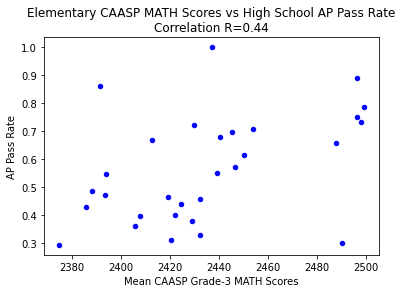

In [52]:
ap_vs_ela_math.plot(x="MATH Weighted Mean Ele", y="AP Pass Rate", kind="scatter", color="blue")
plt.xlabel("Mean CAASP Grade-3 MATH Scores")
plt.title("Elementary CAASP MATH Scores vs High School AP Pass Rate\nCorrelation R=0.44")
ap_vs_ela_math["AP Pass Rate"].corr(ap_vs_ela_math["MATH Weighted Mean Ele"])

#sns.regplot(x='MATH Weighted Mean Ele', y='AP Pass Rate', data=ap_vs_ela_math, scatter_kws={'s': 50}, ci=None, line_kws={'color': 'red'})
#plt.title('Scatter Plot with Trendline')
#plt.show()

0.47357053857484366

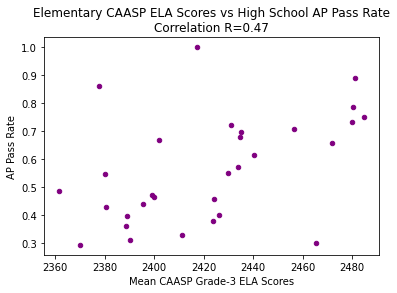

In [55]:
ap_vs_ela_math.plot(x="ELA Weighted Mean Ele", y="AP Pass Rate", kind="scatter", color="purple")
plt.xlabel("Mean CAASP Grade-3 ELA Scores")
plt.title("Elementary CAASP ELA Scores vs High School AP Pass Rate\nCorrelation R=0.47")
ap_vs_ela_math["AP Pass Rate"].corr(ap_vs_ela_math["ELA Weighted Mean Ele"])